In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.chdir("/kaggle/input/dataset-oxford")
os.listdir() 

['labels_oxford.npy',
 '__results__.html',
 '__notebook__.ipynb',
 '__results___files',
 'images_oxford.npy',
 '__output__.json',
 'custom.css']

In [4]:
images = np.load('/kaggle/input/dataset-oxford/images_oxford.npy')
labels = np.load('/kaggle/input/dataset-oxford/labels_oxford.npy',allow_pickle = True)

In [5]:
set(labels)

{'Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier'}

In [6]:
from collections import Counter
breeds = Counter(labels)
breeds

Counter({'american_pit_bull_terrier': 400,
         'leonberger': 400,
         'english_cocker_spaniel': 400,
         'Siamese': 400,
         'saint_bernard': 400,
         'american_bulldog': 400,
         'Sphynx': 400,
         'Egyptian_Mau': 400,
         'Birman': 400,
         'english_setter': 400,
         'newfoundland': 400,
         'pug': 400,
         'yorkshire_terrier': 400,
         'Abyssinian': 400,
         'havanese': 400,
         'miniature_pinscher': 400,
         'chihuahua': 400,
         'basset_hound': 400,
         'Bombay': 400,
         'British_Shorthair': 400,
         'Maine_Coon': 400,
         'Bengal': 400,
         'japanese_chin': 400,
         'shiba_inu': 400,
         'wheaten_terrier': 400,
         'beagle': 400,
         'Persian': 400,
         'great_pyrenees': 400,
         'pomeranian': 400,
         'samoyed': 400,
         'german_shorthaired': 400,
         'Ragdoll': 400,
         'keeshond': 400,
         'Russian_Blue': 400,
   

In [7]:
num_classes = len(breeds)
num_classes

37

In [8]:
images.shape, labels.shape

((14779, 224, 224, 3), (14779,))

In [9]:
images[0], images[0].shape

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 (224, 224, 3))

In [10]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

labels_encoded = to_categorical(labels_encoded)

2024-04-10 20:05:40.553596: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 20:05:40.553701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 20:05:40.662855: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
labels_encoded.shape

(14779, 37)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.30,stratify=labels_encoded, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50,stratify=y_test, random_state=42)

In [13]:
X_train.shape, y_train.shape

((10345, 224, 224, 3), (10345, 37))

In [14]:
X_val.shape, y_val.shape

((2217, 224, 224, 3), (2217, 37))

In [15]:
X_test.shape, y_test.shape

((2217, 224, 224, 3), (2217, 37))

In [16]:
import tensorflow as tf

# Define batch size
batch_size = 32

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Shuffle, batch, and prefetch the datasets
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [17]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 37), dtype=tf.float64, name=None))>

In [18]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 37), dtype=tf.float64, name=None))>

In [19]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 37), dtype=tf.float64, name=None))>

# Calling the Pretrained Models - Resnet50, EfficientNetB0

In [20]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define the number of classes
num_classes = len(breeds)
num_classes

37

In [21]:
# Create and compile the models
def create_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
# Model 1: Pretrained ResNet50
base_model_resnet = ResNet50(weights='imagenet', include_top=False)
model_resnet = create_model(base_model_resnet)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [23]:
# Model 2: Pretrained EfficientNetB0
base_model_efficientnet = EfficientNetB0(weights='imagenet', include_top=False)
model_efficientnet = create_model(base_model_efficientnet)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
# Model 3: Fine-tuned ResNet50
base_model_resnet_fine_tune = ResNet50(weights='imagenet', include_top=False)
for layer in base_model_resnet_fine_tune.layers:
    layer.trainable = True
model_resnet_fine_tune = create_model(base_model_resnet_fine_tune)

In [25]:
# Model 4: Fine-tuned EfficientNetB0
base_model_efficientnet_fine_tune = EfficientNetB0(weights='imagenet', include_top=False)
for layer in base_model_efficientnet_fine_tune.layers:
    layer.trainable = True
model_efficientnet_fine_tune = create_model(base_model_efficientnet_fine_tune)


In [26]:
# Train the models
epochs = 10

In [27]:
history_resnet_base = model_resnet.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/10


I0000 00:00:1712779644.892013      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712779644.993928      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.3198 - loss: 2.4751

W0000 00:00:1712779764.894728      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712779769.695957      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 212s 409ms/step - accuracy: 0.3202 - loss: 2.4731 - val_accuracy: 0.3225 - val_loss: 2.3611
Epoch 2/10


W0000 00:00:1712779777.298351      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 95s 293ms/step - accuracy: 0.6692 - loss: 1.0383 - val_accuracy: 0.3126 - val_loss: 3.3377
Epoch 3/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 299ms/step - accuracy: 0.7974 - loss: 0.6339 - val_accuracy: 0.5580 - val_loss: 1.5089
Epoch 4/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 142s 298ms/step - accuracy: 0.8658 - loss: 0.4264 - val_accuracy: 0.4515 - val_loss: 2.4893
Epoch 5/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 299ms/step - accuracy: 0.8994 - loss: 0.3162 - val_accuracy: 0.6008 - val_loss: 1.4112
Epoch 6/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 299ms/step - accuracy: 0.9192 - loss: 0.2443 - val_accuracy: 0.5539 - val_loss: 1.9038
Epoch 7/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 299ms/step - accuracy: 0.9528 - loss: 0.1423 - val_accuracy: 0.5386 - val_loss: 1.8456
Epoch 8/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 299ms/step - accuracy: 0.9441 - loss: 0.1831 - val_accuracy: 0.4993 - val_loss: 2.2069
Epoch 9/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 300ms/step - accuracy: 0.9538 - loss: 0.1389 - va

In [28]:
history_efficientnet_base = model_efficientnet.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/10
  1/324 ━━━━━━━━━━━━━━━━━━━━ 9:21:31 104s/step - accuracy: 0.0000e+00 - loss: 3.5826

W0000 00:00:1712780797.620603      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.6497 - loss: 1.2381

W0000 00:00:1712780895.241975      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712780901.955556      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 215s 341ms/step - accuracy: 0.6501 - loss: 1.2367 - val_accuracy: 0.8543 - val_loss: 0.4808
Epoch 2/10
  1/324 ━━━━━━━━━━━━━━━━━━━━ 56s 176ms/step - accuracy: 0.9375 - loss: 0.2242

W0000 00:00:1712780907.976353      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 131ms/step - accuracy: 0.8957 - loss: 0.3218 - val_accuracy: 0.8286 - val_loss: 0.6156
Epoch 3/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 134ms/step - accuracy: 0.9137 - loss: 0.2696 - val_accuracy: 0.8832 - val_loss: 0.4268
Epoch 4/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 134ms/step - accuracy: 0.9340 - loss: 0.2073 - val_accuracy: 0.8981 - val_loss: 0.3933
Epoch 5/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 134ms/step - accuracy: 0.9518 - loss: 0.1567 - val_accuracy: 0.9152 - val_loss: 0.3293
Epoch 6/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 134ms/step - accuracy: 0.9520 - loss: 0.1564 - val_accuracy: 0.8832 - val_loss: 0.4068
Epoch 7/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 134ms/step - accuracy: 0.9543 - loss: 0.1505 - val_accuracy: 0.9048 - val_loss: 0.3885
Epoch 8/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 134ms/step - accuracy: 0.9586 - loss: 0.1345 - val_accuracy: 0.8805 - val_loss: 0.5175
Epoch 9/10
324/324 ━━━━━━━━━━━━━━━━━━━━ 82s 135ms/step - accuracy: 0.9596 - loss: 0.1406 - val

In [29]:
# Save the model
model_resnet.save('/kaggle/working/model_resnet.keras')

In [30]:
# Save the model - efficietnet
model_efficientnet.save('/kaggle/working/model_efficientnet.keras')

In [31]:
test_loss_resnet, test_accuracy_resnet = model_resnet.evaluate(X_test, y_test)
print(f"Test Loss for Resnet Model: {test_loss_resnet*100:.2f}%")
print(f"Test Accuracy for Resnet Model: {test_accuracy_resnet*100:.2f}%")

 2/70 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.6328 - loss: 1.3539

W0000 00:00:1712781347.328678      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.6889 - loss: 1.2164
Test Loss for Resnet Model: 120.42%
Test Accuracy for Resnet Model: 69.33%


W0000 00:00:1712781354.981555      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [32]:
test_loss_efficientnet, test_accuracy_efficientnet = model_efficientnet.evaluate(X_test, y_test)
print(f"Test Loss for EfficientNet Model: {test_loss_efficientnet*100:.2f}%")
print(f"Test Accuracy for EfficientNet Model: {test_accuracy_efficientnet*100:.2f}%")

 3/70 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.8559 - loss: 0.5249

W0000 00:00:1712781364.034165      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.8964 - loss: 0.4369
Test Loss for EfficientNet Model: 42.04%
Test Accuracy for EfficientNet Model: 90.17%


W0000 00:00:1712781370.164638      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


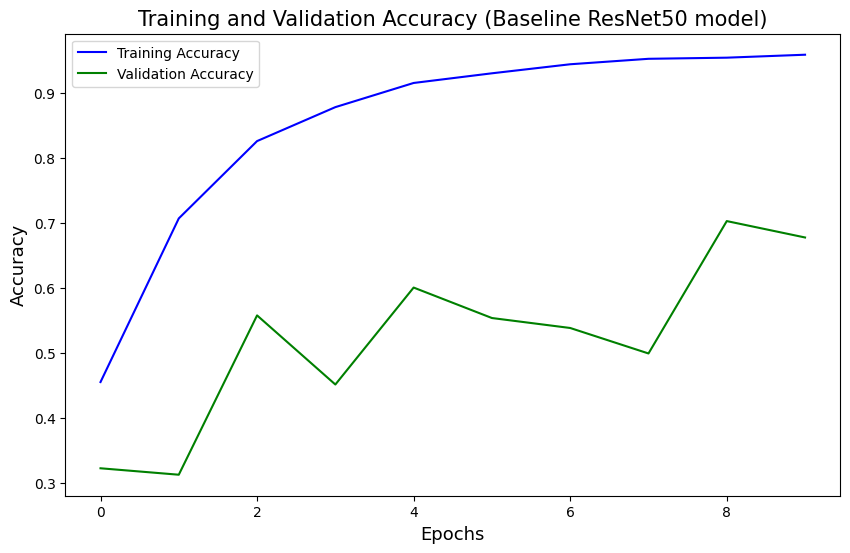

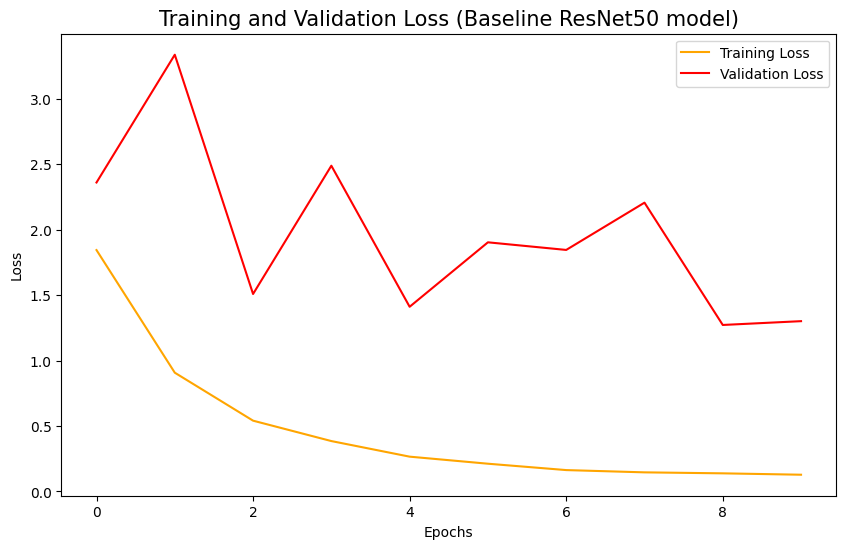

In [33]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracies plot
plt.figure(figsize=(10, 6))
plt.plot(history_resnet_base.history['accuracy'], color="blue", label="Training Accuracy")
plt.plot(history_resnet_base.history['val_accuracy'], color="green", label="Validation Accuracy")
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.title("Training and Validation Accuracy (Baseline ResNet50 model)", fontsize=15)
plt.legend()
plt.show()

# Plotting training and validation loss plot
plt.figure(figsize=(10, 6))
plt.plot(history_resnet_base.history['loss'], color="orange", label="Training Loss")
plt.plot(history_resnet_base.history['val_loss'], color="red", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (Baseline ResNet50 model)", fontsize=15)
plt.legend()
plt.show()


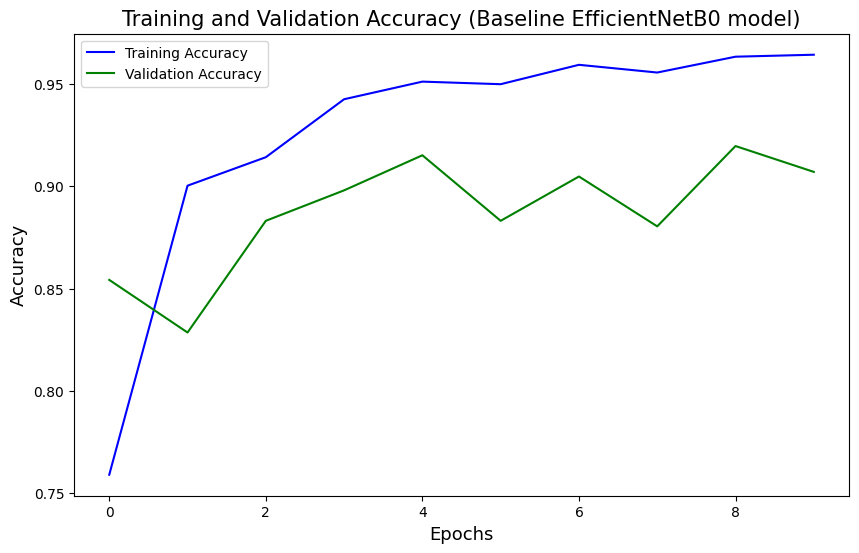

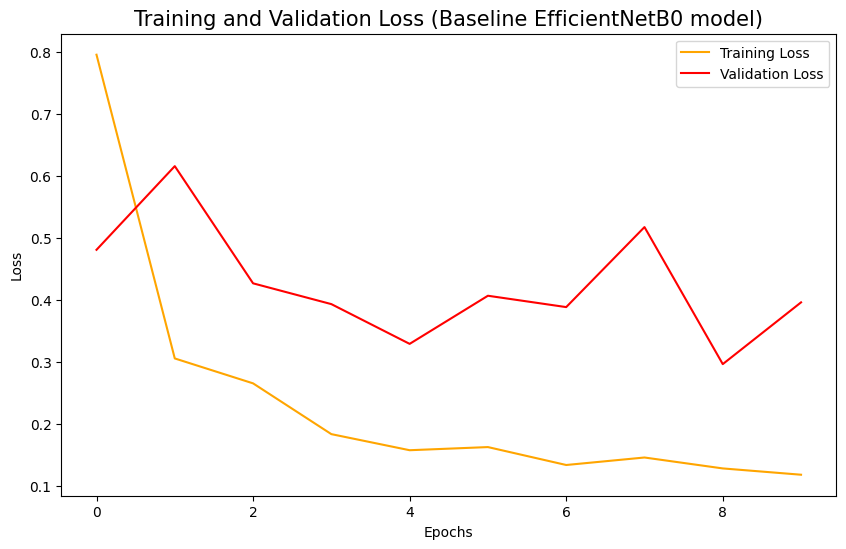

In [34]:
# Plotting training and validation accuracies plot
plt.figure(figsize=(10, 6))
plt.plot(history_efficientnet_base.history['accuracy'], color="blue", label="Training Accuracy")
plt.plot(history_efficientnet_base.history['val_accuracy'], color="green", label="Validation Accuracy")
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.title("Training and Validation Accuracy (Baseline EfficientNetB0 model)", fontsize=15)
plt.legend()
plt.show()

# Plotting training and validation loss plot
plt.figure(figsize=(10, 6))
plt.plot(history_efficientnet_base.history['loss'], color="orange", label="Training Loss")
plt.plot(history_efficientnet_base.history['val_loss'], color="red", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (Baseline EfficientNetB0 model)", fontsize=15)
plt.legend()
plt.show()

In [35]:
# Make predictions
predictions_resnet = model_resnet.predict(X_test)
predictions_effnet = model_efficientnet.predict(X_test)

# Convert predictions to labels
predictions_resnet = np.argmax(predictions_resnet, axis=1)
predictions_effnet = np.argmax(predictions_effnet, axis=1)

print("ResNet50 Predictions:", predictions_resnet)
print("EfficientNetB0 Predictions:", predictions_effnet)

 3/70 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step

W0000 00:00:1712781379.912313      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step


W0000 00:00:1712781389.223505      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 7/70 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step

W0000 00:00:1712781395.898449      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step
ResNet50 Predictions: [ 5  9 24 ...  5  5 16]
EfficientNetB0 Predictions: [ 9  8 24 ... 13 31 16]


W0000 00:00:1712781404.027095      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


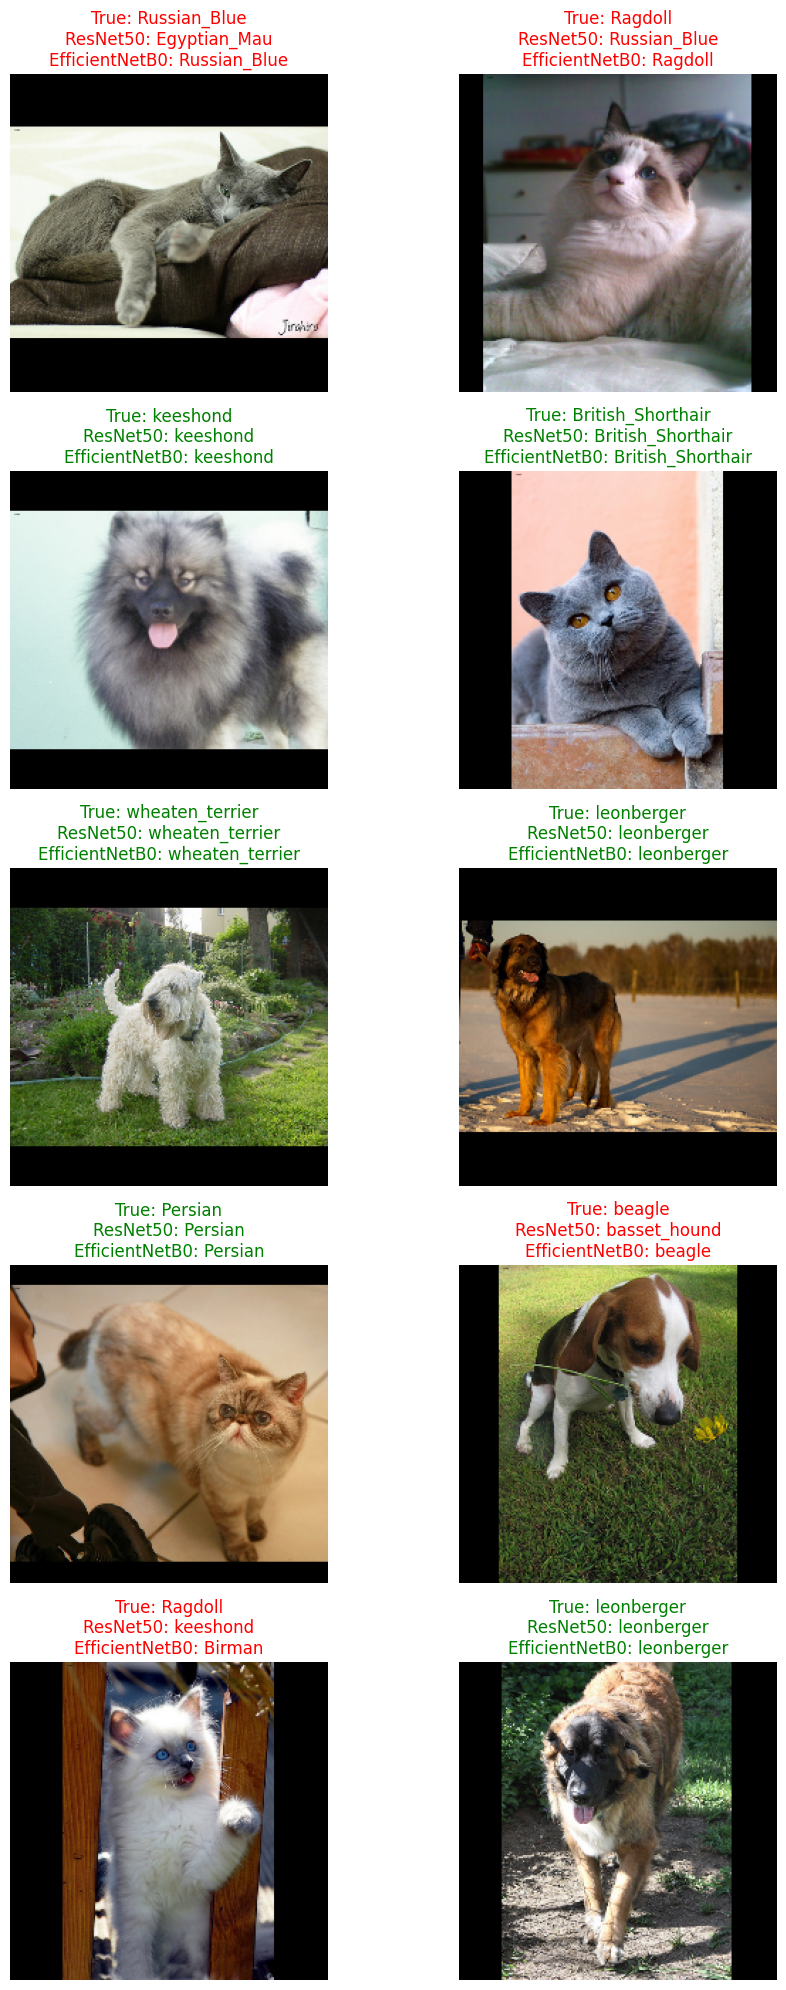

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Convert one-hot encoded labels back to label indices
y_test_indices = np.argmax(y_test, axis=1)

# Convert label indices back to original class names
y_test_names = label_encoder.inverse_transform(y_test_indices)

# Convert predicted label indices back to original class names
predictions_resnet_names = label_encoder.inverse_transform(predictions_resnet)
predictions_effnet_names = label_encoder.inverse_transform(predictions_effnet)

# Plot a random sample of images, true labels, and predicted labels
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(X_test[i])
    
    # Plot true and predicted labels
    true_label = y_test_names[i]
    predicted_label_resnet = predictions_resnet_names[i]
    predicted_label_effnet = predictions_effnet_names[i]
    
    title = ax.set_title(f"True: {true_label}\nResNet50: {predicted_label_resnet}\nEfficientNetB0: {predicted_label_effnet}")
    if predicted_label_resnet == predicted_label_effnet == true_label:
        title.set_color('green')
    else:
        title.set_color('red')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [37]:
history_resnet_fine_tune = model_resnet_fine_tune.fit(train_dataset, validation_data=val_dataset, epochs=15)

Epoch 1/15


W0000 00:00:1712781462.766911      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.3458 - loss: 2.3879

W0000 00:00:1712781571.707788      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712781575.804891      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 175s 372ms/step - accuracy: 0.3462 - loss: 2.3860 - val_accuracy: 0.1299 - val_loss: 4.9944
Epoch 2/15


W0000 00:00:1712781583.033903      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 298ms/step - accuracy: 0.6853 - loss: 1.0223 - val_accuracy: 0.4696 - val_loss: 1.8160
Epoch 3/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 299ms/step - accuracy: 0.8061 - loss: 0.5947 - val_accuracy: 0.4903 - val_loss: 1.8552
Epoch 4/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 299ms/step - accuracy: 0.8644 - loss: 0.4119 - val_accuracy: 0.7249 - val_loss: 0.9929
Epoch 5/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 299ms/step - accuracy: 0.9083 - loss: 0.2794 - val_accuracy: 0.6906 - val_loss: 1.1285
Epoch 6/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 300ms/step - accuracy: 0.9176 - loss: 0.2513 - val_accuracy: 0.5354 - val_loss: 2.4214
Epoch 7/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 299ms/step - accuracy: 0.9375 - loss: 0.1950 - val_accuracy: 0.6802 - val_loss: 1.4167
Epoch 8/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 299ms/step - accuracy: 0.9469 - loss: 0.1596 - val_accuracy: 0.6157 - val_loss: 1.9342
Epoch 9/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 97s 299ms/step - accuracy: 0.9602 - loss: 0.1244 - val

In [38]:
# Save the model - Resnet50 Fine tune
model_resnet_fine_tune.save('/kaggle/working/model_resnet_fine_tune.keras')

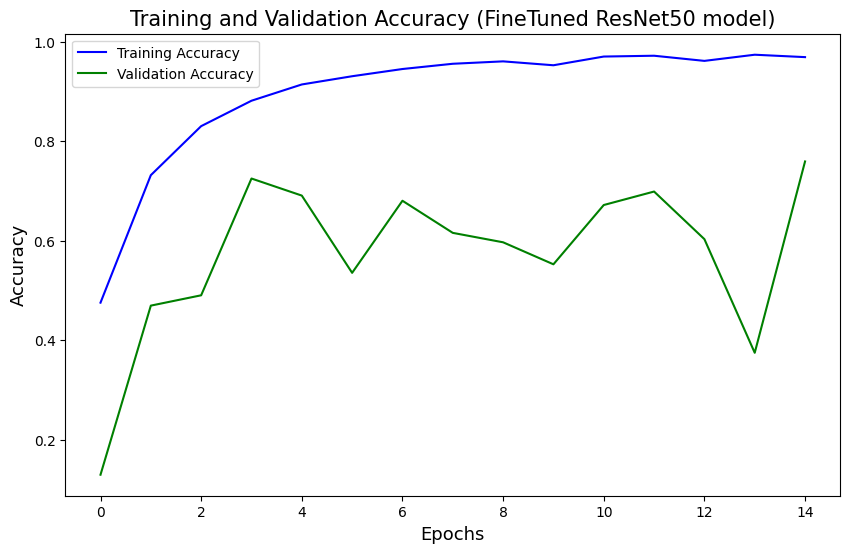

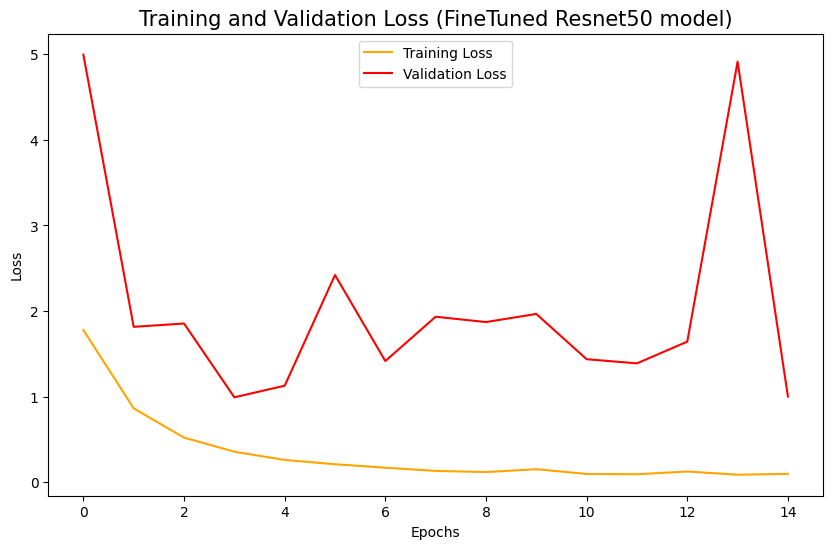

In [39]:
# Plotting training and validation accuracies plot
plt.figure(figsize=(10, 6))
plt.plot(history_resnet_fine_tune.history['accuracy'], color="blue", label="Training Accuracy")
plt.plot(history_resnet_fine_tune.history['val_accuracy'], color="green", label="Validation Accuracy")
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.title("Training and Validation Accuracy (FineTuned ResNet50 model)", fontsize=15)
plt.legend()
plt.show()

# Plotting training and validation loss plot
plt.figure(figsize=(10, 6))
plt.plot(history_resnet_fine_tune.history['loss'], color="orange", label="Training Loss")
plt.plot(history_resnet_fine_tune.history['val_loss'], color="red", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (FineTuned Resnet50 model)", fontsize=15)
plt.legend()
plt.show()

In [40]:
test_loss_resnet_fine_tune, test_accuracy_resnet_fine_tune = model_resnet_fine_tune.evaluate(X_test, y_test)
print(f"Test Loss for Fine Tuned Resnet Model: {test_loss_resnet_fine_tune*100:.2f}%")
print(f"Test Accuracy for Fine Tuned Resnet Model: {test_accuracy_resnet_fine_tune*100:.2f}%")

 2/70 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.7344 - loss: 1.1601

W0000 00:00:1712782953.663582      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.7718 - loss: 0.9907
Test Loss for Fine Tuned Resnet Model: 96.38%
Test Accuracy for Fine Tuned Resnet Model: 77.49%


W0000 00:00:1712782961.066734      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [41]:
# Make predictions
predictions_resnet_fine_tune = model_resnet_fine_tune.predict(X_test)

# Convert predictions to labels
predictions_resnet_fine_tune = np.argmax(predictions_resnet_fine_tune, axis=1)

print("Fine Tuned ResNet50 Predictions:", predictions_resnet_fine_tune)

 3/70 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step

W0000 00:00:1712782967.729602      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step
Fine Tuned ResNet50 Predictions: [ 3 24 24 ... 35 31 16]


W0000 00:00:1712782976.676774      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


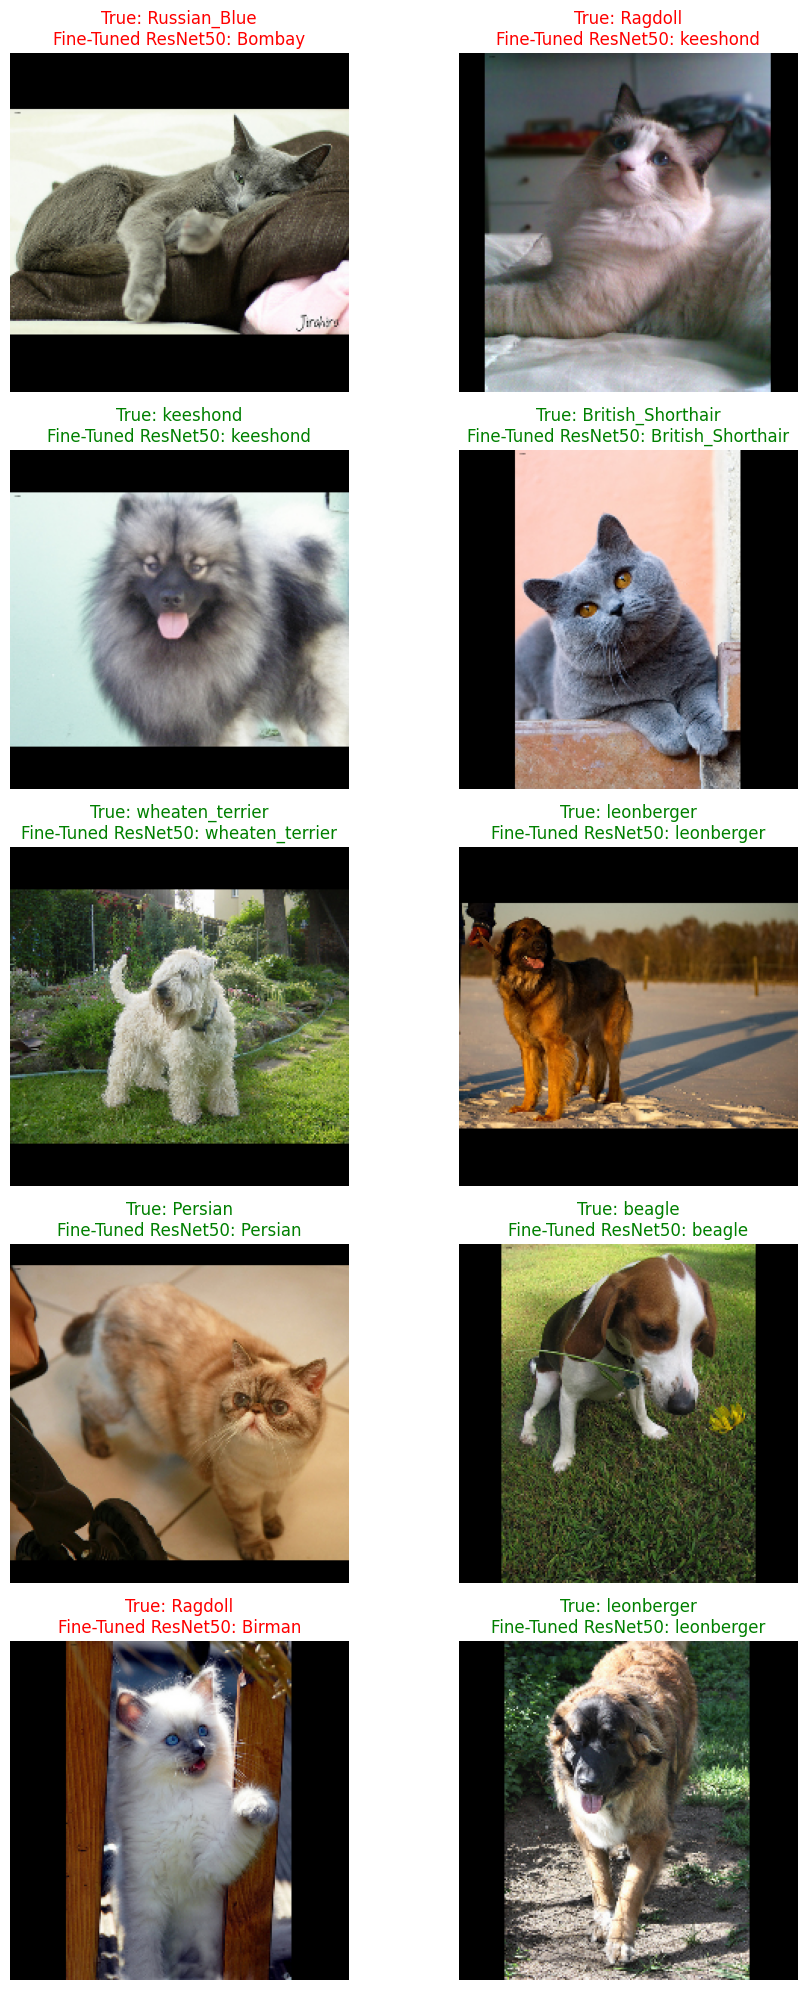

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Convert one-hot encoded labels back to label indices
y_test_indices = np.argmax(y_test, axis=1)

# Convert label indices back to original class names
y_test_names = label_encoder.inverse_transform(y_test_indices)

# Convert predicted label indices back to original class names
predictions_resnet_fine_tune_names = label_encoder.inverse_transform(predictions_resnet_fine_tune)

# Plot a random sample of images, true labels, and predicted labels
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(X_test[i])
    
    # Plot true and predicted labels
    true_label = y_test_names[i]
    predicted_label_resnet_fine_tune = predictions_resnet_fine_tune_names[i]
    
    title = ax.set_title(f"True: {true_label}\nFine-Tuned ResNet50: {predicted_label_resnet_fine_tune}")
    if predicted_label_resnet_fine_tune == true_label:
        title.set_color('green')
    else:
        title.set_color('red')
    ax.axis('off')
    
plt.tight_layout()
plt.show()

In [43]:
history_efficient_fine_tune = model_efficientnet_fine_tune.fit(train_dataset, validation_data=val_dataset, epochs=15)

Epoch 1/15
  1/324 ━━━━━━━━━━━━━━━━━━━━ 7:08:28 80s/step - accuracy: 0.0000e+00 - loss: 3.7366

W0000 00:00:1712783062.489178      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.6523 - loss: 1.2085

W0000 00:00:1712783145.334759      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712783151.268733      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 174s 291ms/step - accuracy: 0.6526 - loss: 1.2071 - val_accuracy: 0.8390 - val_loss: 0.5340
Epoch 2/15
  1/324 ━━━━━━━━━━━━━━━━━━━━ 55s 173ms/step - accuracy: 0.9688 - loss: 0.2223

W0000 00:00:1712783156.716861      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 131ms/step - accuracy: 0.8851 - loss: 0.3686 - val_accuracy: 0.8471 - val_loss: 0.5692
Epoch 3/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 134ms/step - accuracy: 0.9254 - loss: 0.2384 - val_accuracy: 0.8304 - val_loss: 0.6013
Epoch 4/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 44s 134ms/step - accuracy: 0.9398 - loss: 0.2010 - val_accuracy: 0.7776 - val_loss: 1.1277
Epoch 5/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 43s 134ms/step - accuracy: 0.9326 - loss: 0.2084 - val_accuracy: 0.8751 - val_loss: 0.5271
Epoch 6/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 44s 134ms/step - accuracy: 0.9458 - loss: 0.1748 - val_accuracy: 0.9075 - val_loss: 0.3459
Epoch 7/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 44s 135ms/step - accuracy: 0.9508 - loss: 0.1586 - val_accuracy: 0.8823 - val_loss: 0.4815
Epoch 8/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 44s 134ms/step - accuracy: 0.9642 - loss: 0.1104 - val_accuracy: 0.8832 - val_loss: 0.4523
Epoch 9/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 44s 135ms/step - accuracy: 0.9607 - loss: 0.1277 - val

In [44]:
# Save the model - EfficientNetB0 Fine tune
model_efficientnet_fine_tune.save('/kaggle/working/model_efficientnet_fine_tune.keras')

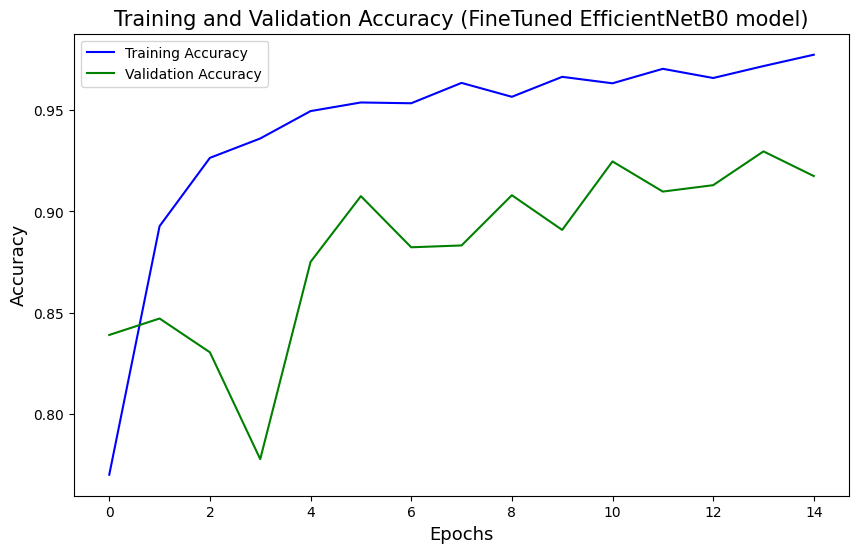

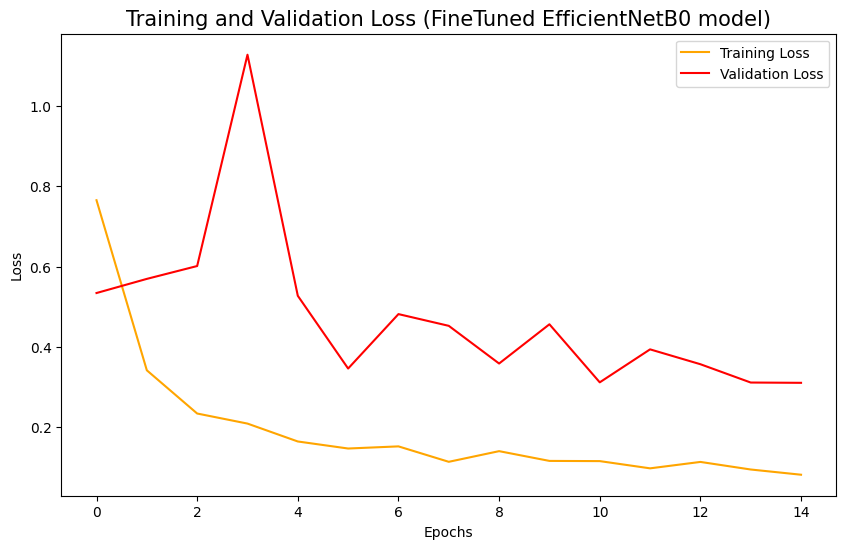

In [45]:
# Plotting training and validation accuracies plot
plt.figure(figsize=(10, 6))
plt.plot(history_efficient_fine_tune.history['accuracy'], color="blue", label="Training Accuracy")
plt.plot(history_efficient_fine_tune.history['val_accuracy'], color="green", label="Validation Accuracy")
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.title("Training and Validation Accuracy (FineTuned EfficientNetB0 model)", fontsize=15)
plt.legend()
plt.show()

# Plotting training and validation loss plot
plt.figure(figsize=(10, 6))
plt.plot(history_efficient_fine_tune.history['loss'], color="orange", label="Training Loss")
plt.plot(history_efficient_fine_tune.history['val_loss'], color="red", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (FineTuned EfficientNetB0 model)", fontsize=15)
plt.legend()
plt.show()

In [46]:
test_loss_efficientnet_fine_tune, test_accuracy_efficientnet_fine_tune = model_efficientnet_fine_tune.evaluate(X_test, y_test)
print(f"Test Loss for Fine Tuned EfficientNetB0 Model: {test_loss_efficientnet_fine_tune*100:.2f}%")
print(f"Test Accuracy for Fine Tuned EfficientNetB0 Model: {test_accuracy_efficientnet_fine_tune*100:.2f}%")

 4/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9167 - loss: 0.4568

W0000 00:00:1712783783.607770      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.9231 - loss: 0.3403
Test Loss for Fine Tuned EfficientNetB0 Model: 32.22%
Test Accuracy for Fine Tuned EfficientNetB0 Model: 92.74%


W0000 00:00:1712783789.208528      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [47]:
# Make predictions
predictions_efficientnet_fine_tune = model_efficientnet_fine_tune.predict(X_test)

# Convert predictions to labels
predictions_efficientnet_fine_tune = np.argmax(predictions_efficientnet_fine_tune, axis=1)

print("Fine Tuned EfficientNetB0 Predictions:", predictions_efficientnet_fine_tune)

 5/70 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step

W0000 00:00:1712783799.191029      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step
Fine Tuned EfficientNetB0 Predictions: [ 9  8 24 ... 20 31 16]


W0000 00:00:1712783807.054315      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


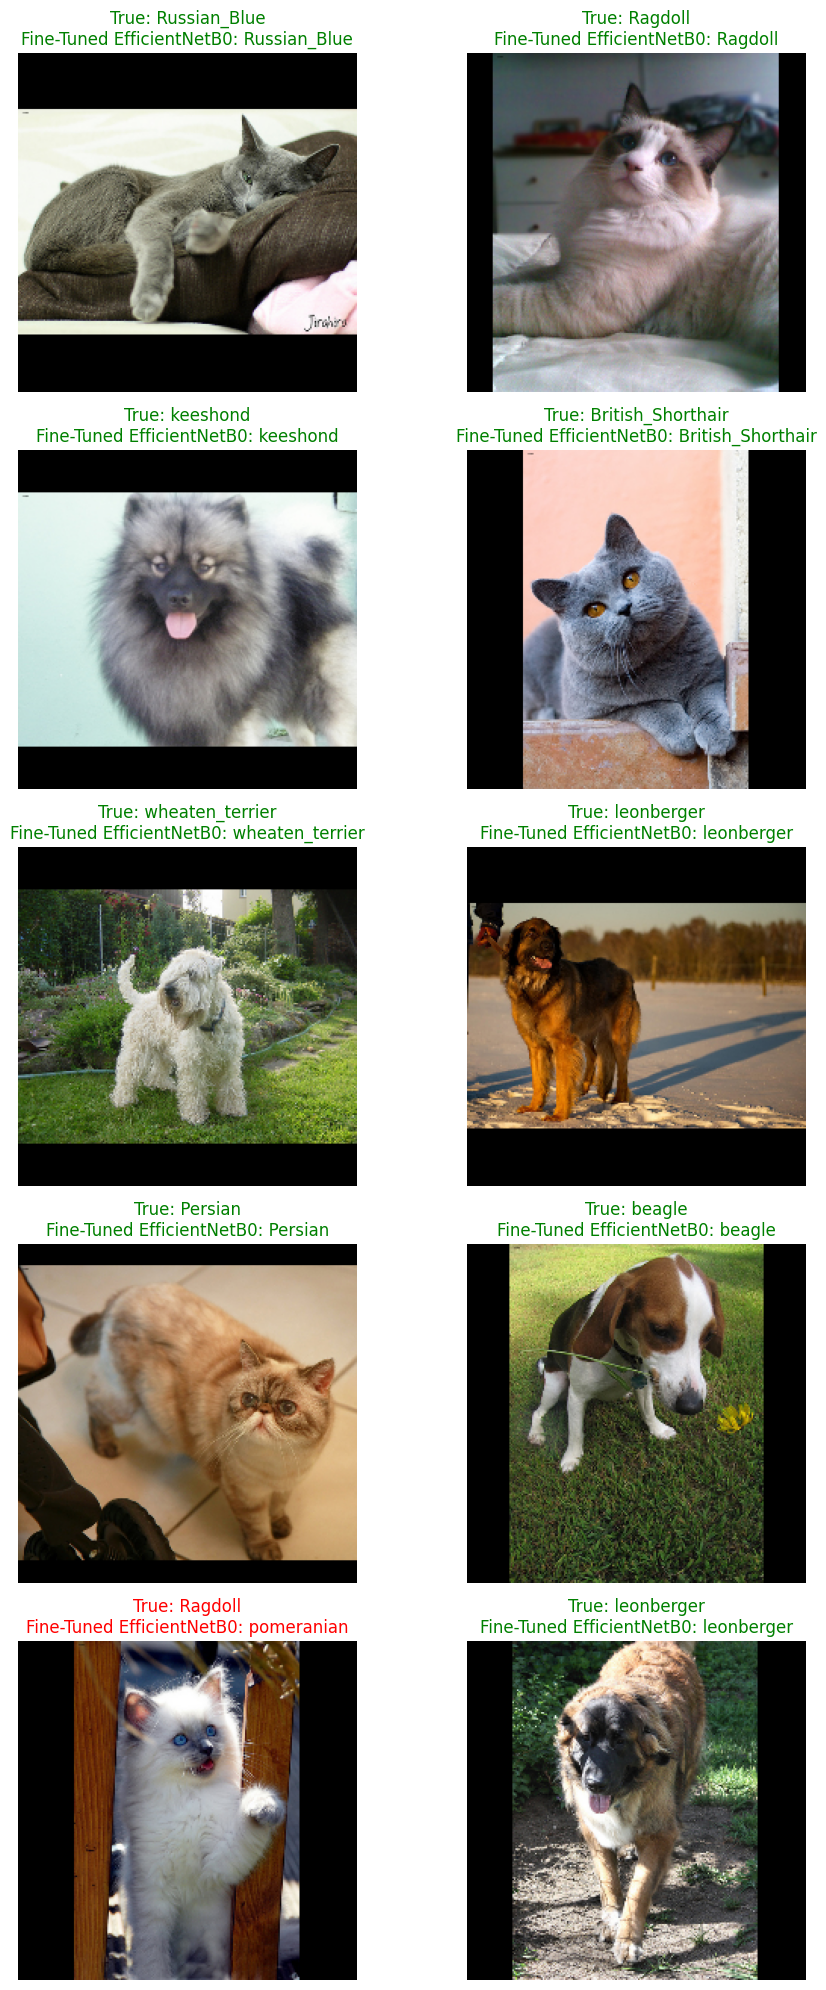

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Convert one-hot encoded labels back to label indices
y_test_indices = np.argmax(y_test, axis=1)

# Convert label indices back to original class names
y_test_names = label_encoder.inverse_transform(y_test_indices)

# Convert predicted label indices back to original class names
predictions_efficientnet_fine_tune_names = label_encoder.inverse_transform(predictions_efficientnet_fine_tune)

# Plot a random sample of images, true labels, and predicted labels
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

for i, ax in enumerate(axes.flat):
    # Plot image
    ax.imshow(X_test[i])
    
    # Plot true and predicted labels
    true_label = y_test_names[i]
    predicted_label_efficientnet_fine_tune = predictions_efficientnet_fine_tune_names[i]
    
    title = ax.set_title(f"True: {true_label}\nFine-Tuned EfficientNetB0: {predicted_label_efficientnet_fine_tune}")
    if predicted_label_efficientnet_fine_tune == true_label:
        title.set_color('green')
    else:
        title.set_color('red')
    ax.axis('off')

plt.tight_layout()
plt.show()